Purpose : Explore the data to find predict who is more likely to click the ad!
    
    https://www.kaggle.com/fayomi/advertising

In [118]:
df = pd.read_csv('../input/advertising/advertising.csv')

In [119]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [120]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


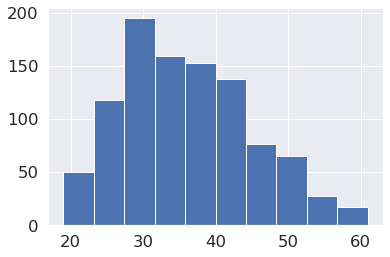

In [122]:
df["Age"].hist();

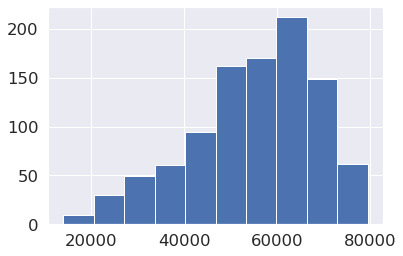

In [123]:
df["Area Income"].hist();

In [124]:
df["Male"].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [125]:
df_copy = df.copy()
df_copy["AgeBucket"] = df_copy["Age"] // 15 * 15
df_copy[["AgeBucket", "Clicked on Ad"]].groupby(["AgeBucket"]).mean()
df["AgeBucket"] = df["Age"] // 15 * 15

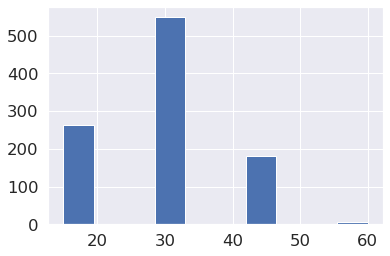

In [126]:
df_copy["AgeBucket"].hist();

In [127]:
df_copy["AgeBucket"].value_counts()

30    549
15    264
45    182
60      5
Name: AgeBucket, dtype: int64

In [128]:
df_copy["TimeBucket"] = df_copy["Daily Time Spent on Site"] // 15 * 15
df_copy[["TimeBucket", "Clicked on Ad"]].groupby(["TimeBucket"]).mean()
df["TimeBucket"] = df["Daily Time Spent on Site"] // 15 * 15

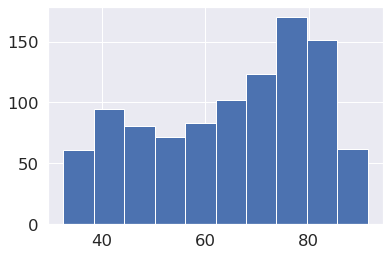

In [129]:
df["Daily Time Spent on Site"].hist();

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  AgeBucket                 1000 non-null   int64  
 11  TimeBucket                1000 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


In [131]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Ad Topic Line
City
Country
Timestamp


In [132]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Ad Topic Line             1000 non-null   category
 5   City                      1000 non-null   category
 6   Male                      1000 non-null   int64   
 7   Country                   1000 non-null   category
 8   Timestamp                 1000 non-null   category
 9   Clicked on Ad             1000 non-null   int64   
 10  AgeBucket                 1000 non-null   int64   
 11  TimeBucket                1000 non-null   float64 
dtypes: category(4), float64(4), int64(4)
memory usage: 225.5 KB


In [134]:
# Turn categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   int16  
 5   City                      1000 non-null   int16  
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   int16  
 8   Timestamp                 1000 non-null   int16  
 9   Clicked on Ad             1000 non-null   int64  
 10  AgeBucket                 1000 non-null   int64  
 11  TimeBucket                1000 non-null   float64
dtypes: float64(4), int16(4), int64(4)
memory usage: 70.4 KB


In [136]:
X = df.drop("Clicked on Ad", axis = 1)
y = df["Clicked on Ad"]

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state=42)

In [138]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

rfc_model.score(X_test, y_test)

0.945

In [139]:
from sklearn.preprocessing import StandardScaler

scaled_features = df.copy()

col_names = ['Age', 'Area Income']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features


In [140]:
X_scaled = scaled_features.drop("Clicked on Ad", axis = 1)
y_scaled = scaled_features["Clicked on Ad"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=42)

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train2, y_train2)

rfc_model.score(X_test2, y_test2)

0.94

Try other models and compare scaled dataset vs original dataset

Try: 
    KNeighborsClassifier
    LogisiticRegression
    SGDClassifier

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "SGDClassifier": SGDClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
       
        model.fit(X_train, y_train)
       
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [142]:
fit_and_score(models, X_train2, X_test2, y_train2, y_test2)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.675, 'Logistic Regression': 0.875, 'SGDClassifier': 0.82}

In [143]:
fit_and_score(models, X_train, X_test, y_train, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.605, 'Logistic Regression': 0.785, 'SGDClassifier': 0.535}

Looks Like the RandomForestClassifier on the original training and test set with the
additional AgeBucket column and the TimeBucket column gives the highest accuracy at 95%

Let's see if adding an additional column can increase the accuracy of prediction

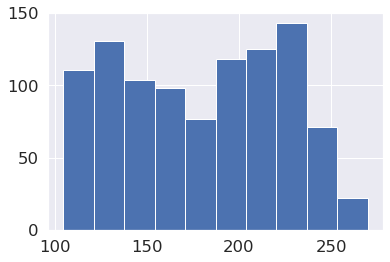

In [144]:
df["Daily Internet Usage"].hist();

In [145]:
df_copy["InternetUsageBucket"] = df_copy["Daily Internet Usage"] // 15 * 15
df_copy[["InternetUsageBucket", "Clicked on Ad"]].groupby(["InternetUsageBucket"]).mean()

,Clicked on Ad
InternetUsageBucket,
90.0,1.000000
105.0,1.000000
120.0,1.000000
135.0,0.978947
150.0,0.872340
165.0,0.617284
180.0,0.225000
195.0,0.178571
210.0,0.056911


In [146]:
df_copy["InternetUsageBucket"].value_counts()

210.0    123
120.0    123
225.0    120
195.0    112
135.0     95
150.0     94
105.0     94
165.0     81
180.0     80
240.0     62
255.0     15
90.0       1
Name: InternetUsageBucket, dtype: int64

In [147]:
df["InternetUsageBucket"] = df["Daily Internet Usage"] // 15 * 15

In [148]:
X = df.drop("Clicked on Ad", axis = 1)
y = df["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state=42)
rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

rfc_model.score(X_test, y_test)


0.91

So it decreased after adding the last column so I will delete the last column and leave the model at an accuracy of 95%
until I figure out how to improve it again

In [149]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,AgeBucket,TimeBucket,InternetUsageBucket
0,68.95,35,61833.90,256.09,91,961,0,215,439,0,30,60.0,255.0
1,80.23,31,68441.85,193.77,464,903,1,147,474,0,30,75.0,180.0
2,69.47,26,59785.94,236.50,566,111,0,184,367,0,15,60.0,225.0
3,74.15,29,54806.18,245.89,903,939,1,103,56,0,15,60.0,240.0
4,68.37,35,73889.99,225.58,766,805,0,96,767,0,30,60.0,225.0


In [150]:
df.drop("InternetUsageBucket", axis=1, inplace=True)

In [151]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,AgeBucket,TimeBucket
0,68.95,35,61833.90,256.09,91,961,0,215,439,0,30,60.0
1,80.23,31,68441.85,193.77,464,903,1,147,474,0,30,75.0
2,69.47,26,59785.94,236.50,566,111,0,184,367,0,15,60.0
3,74.15,29,54806.18,245.89,903,939,1,103,56,0,15,60.0
4,68.37,35,73889.99,225.58,766,805,0,96,767,0,30,60.0


In [152]:
# Create Prediction on test set

y_preds = rfc_model.predict(X_test)

y_preds

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1])

In [153]:
# create a Confusion Matrix showing accuracy of test predictions
    
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 80   9]
 [  9 102]]


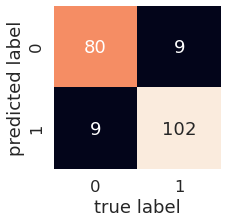

In [154]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
   
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                    fmt='d')
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Not too bad of a prediction model on this dataset

In [155]:
type(y_test)

pandas.core.series.Series

In [156]:
# Create a dataframe with test set and add prediction column on the end

prediction_dataframe = pd.DataFrame(X_test)


prediction_dataframe["Clicked on Ad Actual"] = y_test
prediction_dataframe["Clicked on Ad Prediction"] = y_preds


In [157]:
prediction_dataframe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,AgeBucket,TimeBucket,InternetUsageBucket,Clicked on Ad Actual,Clicked on Ad Prediction
521,63.26,29,54787.37,120.46,153,145,1,65,310,15,60.0,120.0,1,1
737,71.23,52,41521.28,122.59,801,198,0,203,30,45,60.0,120.0,1,1
740,43.63,38,61757.12,135.25,694,212,1,111,715,30,30.0,135.0,1,1
660,42.04,49,67323.00,182.11,570,485,0,171,162,45,30.0,180.0,1,1
411,78.68,29,66225.72,208.05,425,418,0,102,82,15,75.0,195.0,0,0


In [158]:
prediction_dataframe.to_csv("DatasetWithPredictionColumn.csv")